In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from cifar_helper import reformat_images,generate_figures,show_images
%matplotlib inline


In [2]:
import csv as csv
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn import svm, datasets
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.svm import SVC

In [3]:
def unpickle(file):
    import _pickle as cPickle
    with open(file, 'rb') as fo:
        dict = cPickle.load(fo,encoding='latin1')
    return dict


In [4]:
batch_1 = unpickle('cifar-10-batches-py/data_batch_1')
batch_2 = unpickle('cifar-10-batches-py/data_batch_2')
batch_3 = unpickle('cifar-10-batches-py/data_batch_3')
batch_4 = unpickle('cifar-10-batches-py/data_batch_4')
batch_5 = unpickle('cifar-10-batches-py/data_batch_5')

test = unpickle('cifar-10-batches-py/test_batch')


X_train = np.concatenate((batch_1['data'],
                          batch_2['data'],
                          batch_3['data'],
                          batch_4['data'],
                          batch_5['data']), axis=0)

Y_train = np.concatenate((batch_1['labels'],
                          batch_2['labels'],
                          batch_3['labels'],
                          batch_4['labels'],
                          batch_5['labels']), axis=0)


X_test = test['data']
Y_test = np.asarray(test['labels'])

labels = {0:'airplane',
          1:'automobile',
          2:'bird',
          3:'cat',
          4:'deer',
          5:'dog',
          6:'frog',
          7:'horse',
          8:'ship',
          9:'truck'
         }

In [5]:
x=32
y=32
c=3



In [6]:
X_train_image=reformat_images(X_train,x,y,c)


In [7]:
imgDictionary, labelSubset=generate_figures(X_train_image,Y_train,labels,7)


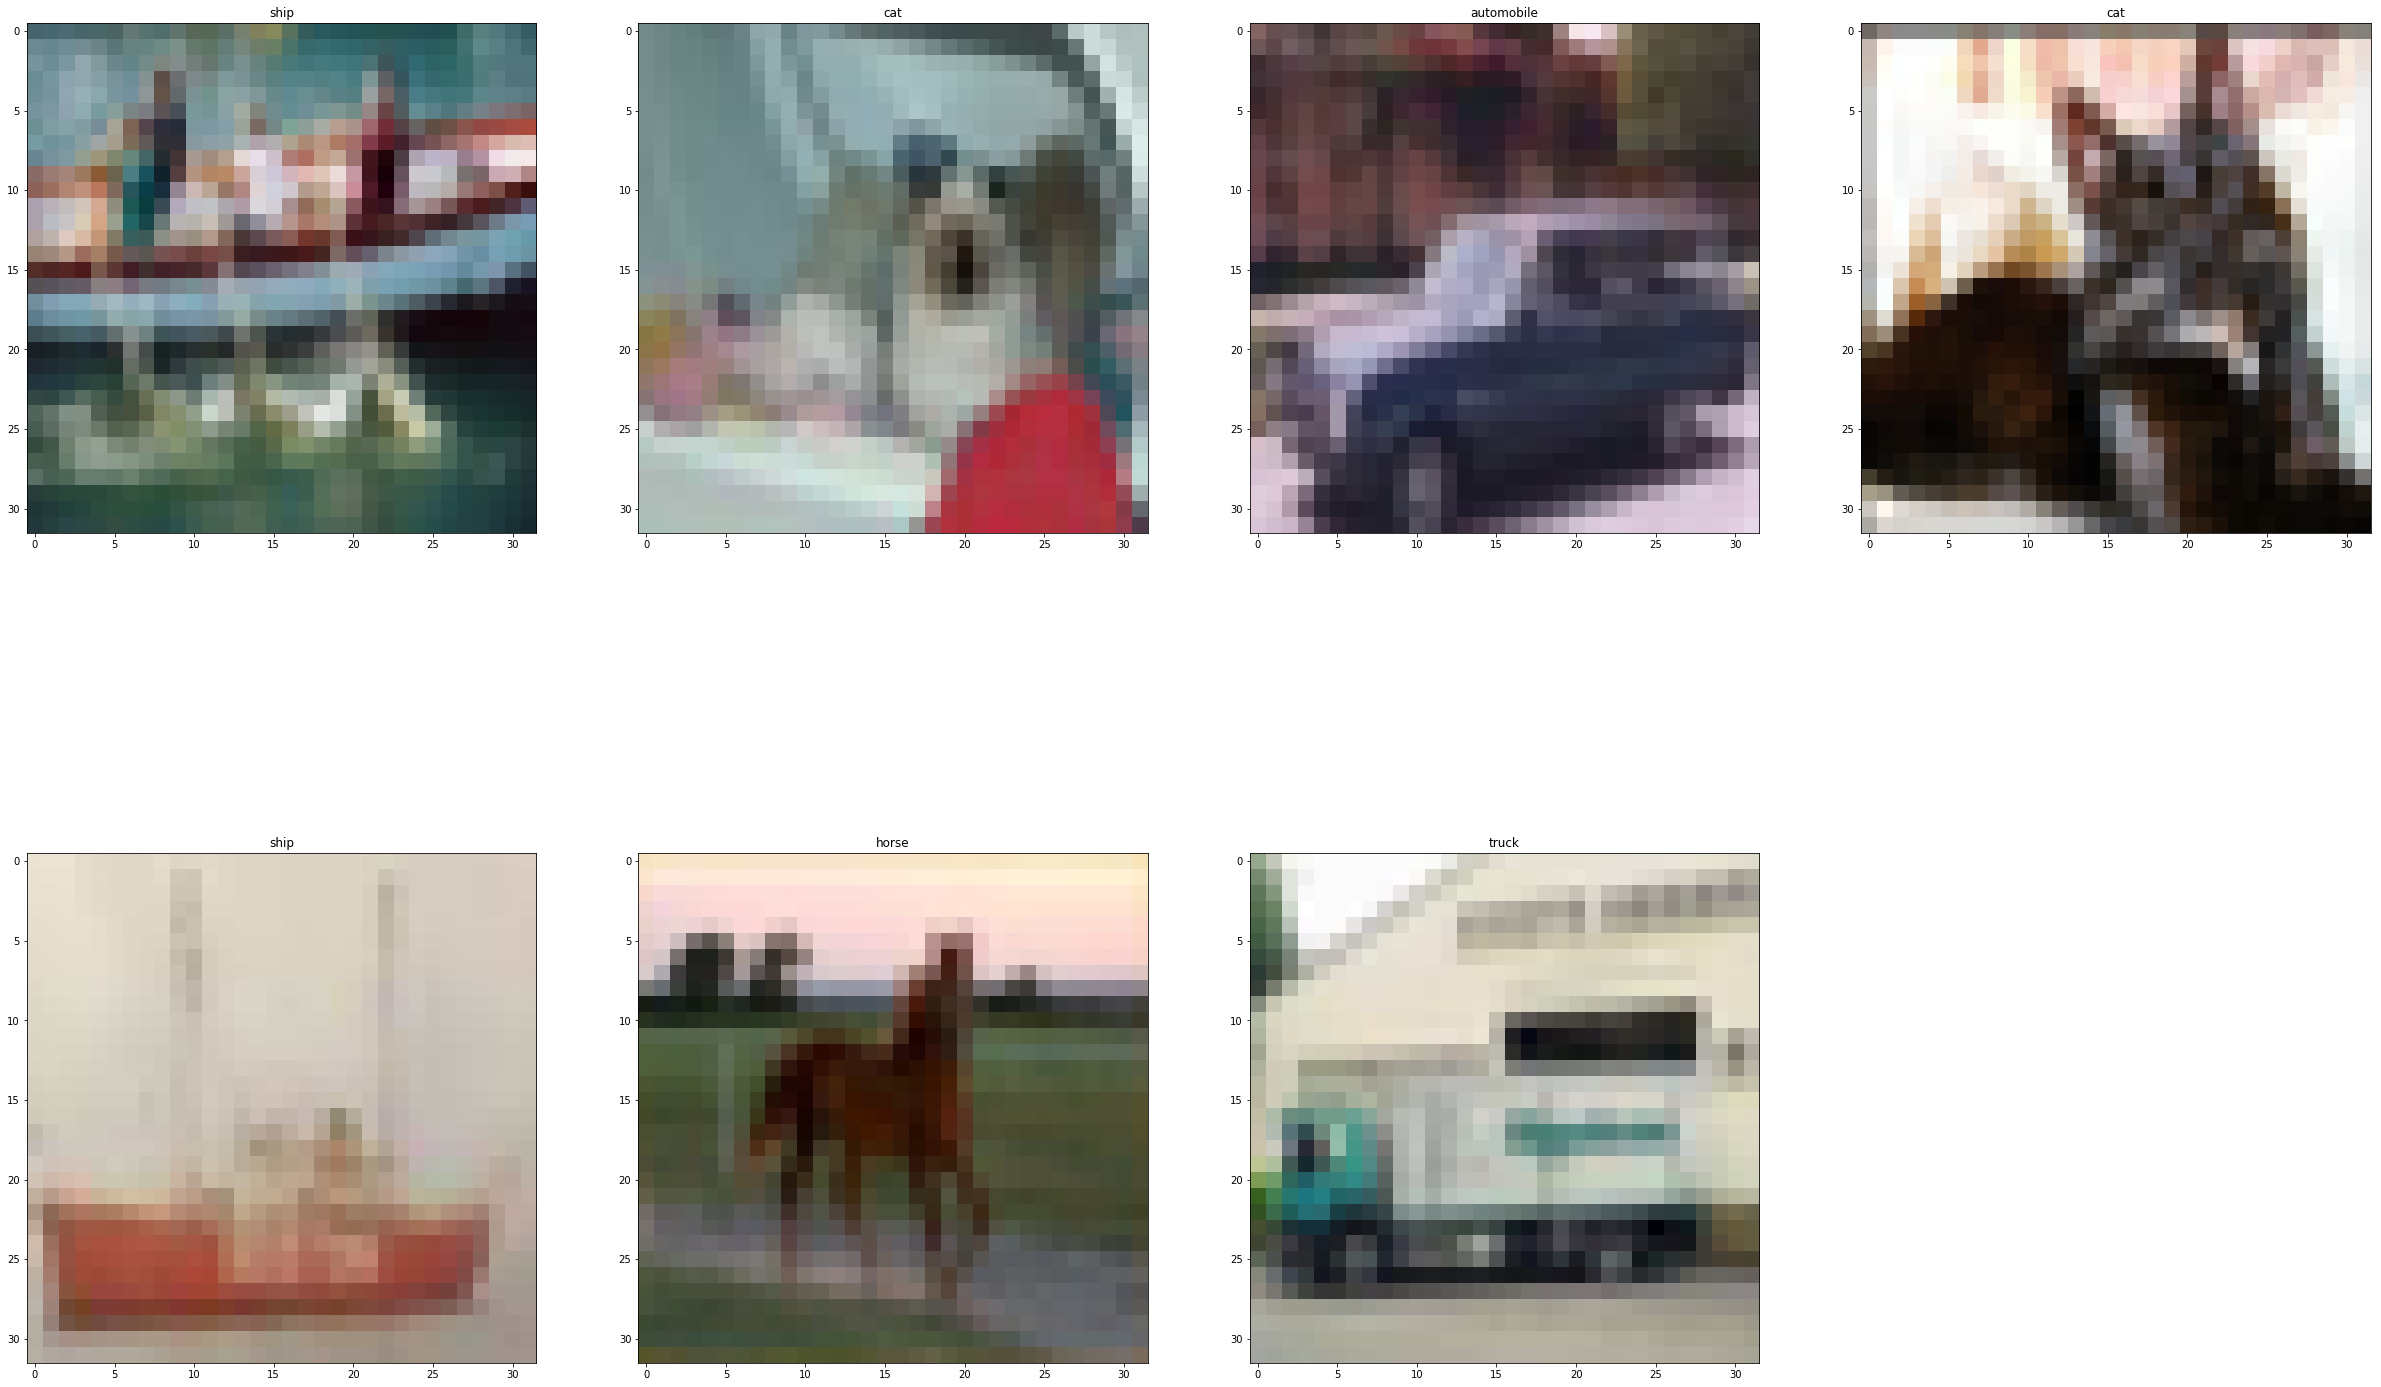

In [8]:
show_images(imgDictionary,2,labelSubset)

In [9]:
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}


In [13]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['poly']}
]

clf = SVC(cache_size=20000)


clf = GridSearchCV(clf, param_grid, n_jobs=-1,verbose=1, cv=5)


In [ ]:
clf.fit(X_train, Y_train)


Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] C=1, degree=1, kernel=poly ......................................
[CV] C=1, degree=1, kernel=poly ......................................
[CV] C=1, degree=1, kernel=poly ......................................
[CV] C=1, degree=2, kernel=poly ......................................
[CV] C=1, degree=2, kernel=poly ......................................
[CV] C=1, degree=2, kernel=poly ......................................


In [ ]:
clf.score(X_test, Y_test)